In [6]:
import csv
import sys
from casacore.tables import table
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [45]:

MSfile = '/data/users/kyle/Mishas_Data/M83_Flag'

t = table(MSfile,readonly=False)
print('\nMS: ', MSfile, '\n')
print(t1.summary)

# print MS columns
print('MS tables: ', t.colnames(), '\n')


Successful read/write open of default-locked table /data/users/kyle/Mishas_Data/M83_Flag: 23 columns, 115500 rows
('\nMS: ', '/data/users/kyle/Mishas_Data/M83_Flag', '\n')
<bound method table.summary of <casacore.tables.table.table object at 0x7f1cddc5f4c8>>
('MS tables: ', ['UVW', 'FLAG', 'FLAG_CATEGORY', 'WEIGHT', 'SIGMA', 'ANTENNA1', 'ANTENNA2', 'ARRAY_ID', 'DATA_DESC_ID', 'EXPOSURE', 'FEED1', 'FEED2', 'FIELD_ID', 'FLAG_ROW', 'INTERVAL', 'OBSERVATION_ID', 'PROCESSOR_ID', 'SCAN_NUMBER', 'STATE_ID', 'TIME', 'TIME_CENTROID', 'DATA', 'WEIGHT_SPECTRUM'], '\n')


In [7]:
A1 = t.getcol("ANTENNA1")
A2 = t.getcol("ANTENNA2")
data = t.getcol("DATA")
ant_list = list(set(np.append(A1,A2)))
com =  np.array(list(itertools.combinations(ant_list,2)));


In [46]:
flag = t.getcol("FLAG")

In [27]:
a = np.empty([1100000,84],dtype=complex)
c = 0
for i in range (0,com.shape[0]):
        for j in range (0,data.shape[2]):
            a[:,c] = ((data[(A1==com[i,0]) & (A2==com[i,1])][:,:,j])).flatten()
            c = c +1

In [47]:
b = np.empty([1100000,84],dtype=int)
c = 0
for i in range (0,com.shape[0]):
        for j in range (0,data.shape[2]):
            b[:,c] = ((flag[(A1==com[i,0]) & (A2==com[i,1])][:,:,j])).flatten()
            c = c +1

In [70]:
np.absolute(a[:,0])

array([1.11496747, 1.2971996 , 1.82487139, ..., 3.94942149, 4.3084238 ,
       3.30534167])

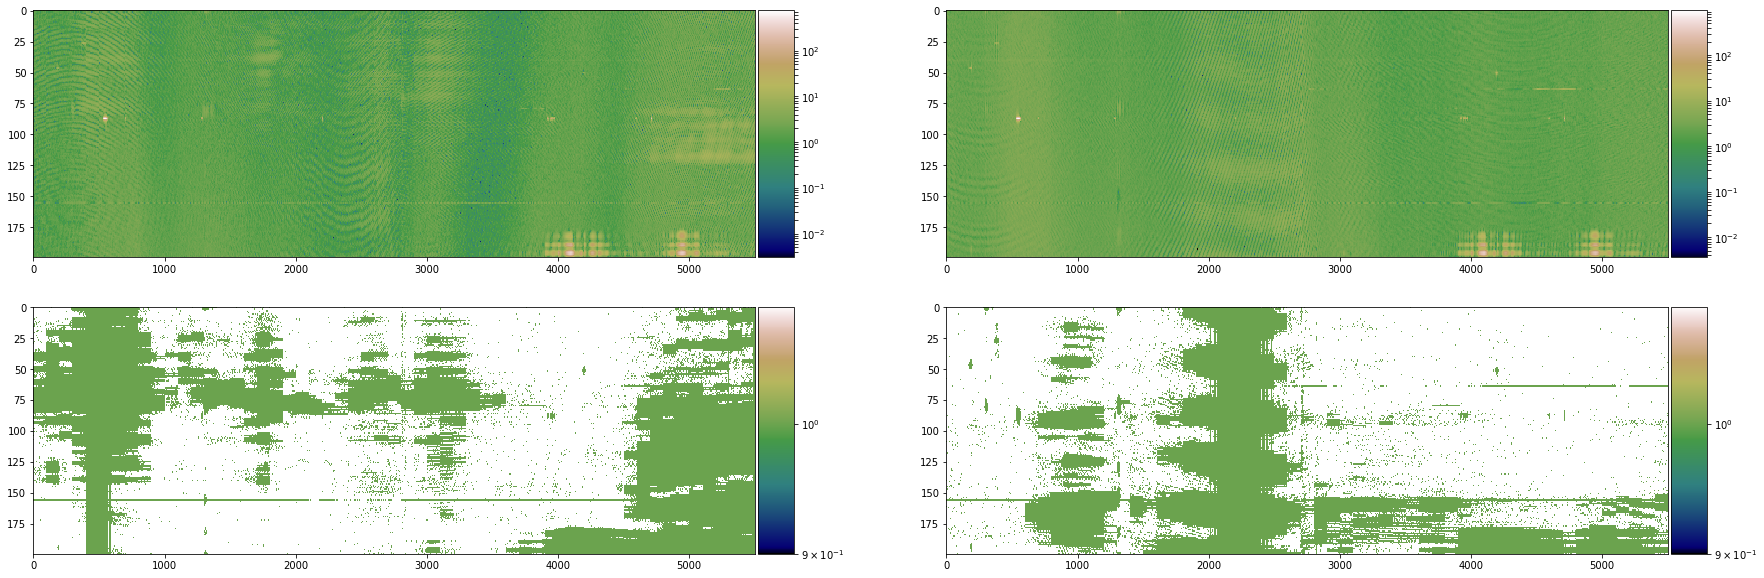

In [79]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(221)
im1 = ax1.imshow(np.transpose(np.absolute((a[:,0]).reshape(5500,200))), aspect="auto", cmap="gist_earth", norm=matplotlib.colors.LogNorm())

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(np.transpose(np.absolute((a[:,4]).reshape(5500,200))), aspect="auto", cmap="gist_earth", norm=matplotlib.colors.LogNorm())

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(np.transpose(b[:,0].reshape(5500,200)), aspect="auto", cmap="gist_earth", norm=matplotlib.colors.LogNorm())

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical');

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(np.transpose(b[:,4].reshape(5500,200)), aspect="auto", cmap="gist_earth", norm=matplotlib.colors.LogNorm())

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical');